# Homework2: Autoregressive models & VAE

## Task 1: Theory (3pt)

1. In Lecture 3 we encountered a problem with Monte Carlo estimation deriving the ELBO gradient at the E-step, since the distribution function $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$ depends on the differentiation parameters $\boldsymbol{\phi}$.
\begin{align*}
    \nabla_{\boldsymbol{\phi}} \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) &= \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} \\
    & \neq  \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \nabla_{\boldsymbol{\phi}} \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} \\
\end{align*}
The Reparametrization trick allowed us to skip the gradient and get a Monte Carlo estimate. 

    However, there is another way that uses the so-called **log-derivative trick**:
    $$
        \nabla_\xi  \log q(\eta| \xi) = \frac{\nabla_\xi q(\eta| \xi)}{q(\eta| \xi)}.
    $$
    1. Get the Monte Carlo estimate of the gradient using the formula for the derivative of the logarithm.
    2. The final expression works significantly worse than the reparametrization trick. Namely, it has a huge variance. Try to describe the intuition why the evaluation has a high variance (you need to think about what order and sign the terms in the expression will have).

* A. 
\begin{align*}
\nabla_{\boldsymbol{\phi}} \mathcal{L} (\boldsymbol{\phi}, \boldsymbol{\theta}) = \nabla_{\boldsymbol{\phi}} \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} = \\ \int \nabla_{\boldsymbol{\phi}}( q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) ) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z}-\int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \nabla_{\boldsymbol{\phi}}(\log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi})) d \mathbf{z} = \\ \int \nabla_{\boldsymbol{\phi}}( q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) ) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} = \int q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) \nabla_{\boldsymbol{\phi}}( \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) ) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] d \mathbf{z} = \\ \mathbb{E}_{q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi})} \nabla_{\boldsymbol{\phi}}( \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) ) \left[\log p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta}) - \log q(\mathbf{z}| \mathbf{x}, \boldsymbol{\phi}) \right] \approx \frac{1}{N} \sum_{i=1}^{N} \nabla_{\boldsymbol{\phi}}( \log q(\mathbf{z_i}| \mathbf{x}, \boldsymbol{\phi}) ) \left[\log p(\mathbf{x}, \mathbf{z_i} | \boldsymbol{\theta}) - \log q(\mathbf{z_i}| \mathbf{x}, \boldsymbol{\phi}) \right]
\end{align*}
* B. 


\begin{align*}
\end{align*}


2. In Lecture 4 we discussed [IWAE](https://arxiv.org/abs/1509.00519) model. This model introduces the improved version of the variational lower bound (ELBO):

    $$
        \mathcal{L}_K (q, \boldsymbol{\theta})  = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right) \rightarrow \max_{q, \boldsymbol{\theta}}.
    $$

    Here we had the theorem without proof:

    1. $\log p(\mathbf{x} | \boldsymbol{\theta}) \geq \mathcal{L}_K (q, \boldsymbol{\theta}) \geq \mathcal{L}_M (q, \boldsymbol{\theta}), \quad \text{for } K \geq M$;
    2.  $\log p(\mathbf{x} | \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathcal{L}_K (q, \boldsymbol{\theta})$ if $\frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z} | \mathbf{x})}$ is bounded.

    Now it is time to prove it :)
    
    **Hints:**
    1. Use the following equation inside the logarithm of $\mathcal{L}_K (q, \boldsymbol{\theta})$
    $$
        \frac{a_1 + \dots + a_K}{K} = \mathbb{E}_{k_1, \dots, k_M} \frac{a_{k_1} + \dots + a_{k_M}}{M}, \quad k_1, \dots, k_M \sim U[1, K]
    $$
    2. Apply Jensen' inequality.
    3. For the second part use the Law of large numbers.


* A.
\begin{align*}
\mathcal{L}_K (q, \boldsymbol{\theta}) = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right) =  \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \mathbb{E}_{k_1, \dots, k_M} \frac{ \frac{p(\mathbf{x}, \mathbf{z}_{k_1} | \boldsymbol{\theta})}{q(\mathbf{z}_{k_1}| \mathbf{x})} + \dots + \frac{p(\mathbf{x}, \mathbf{z}_{k_M} | \boldsymbol{\theta})}{q(\mathbf{z}_{k_M}| \mathbf{x})}}{M} \right), \quad k_1, \dots, k_M \sim U[1, K] \geq \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \mathbb{E}_{k_1, \dots, k_M} \log \left( \frac{ \frac{p(\mathbf{x}, \mathbf{z}_{k_1} | \boldsymbol{\theta})}{q(\mathbf{z}_{k_1}| \mathbf{x})} + \dots + \frac{p(\mathbf{x}, \mathbf{z}_{k_M} | \boldsymbol{\theta})}{q(\mathbf{z}_{k_M}| \mathbf{x})}}{M} \right) = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_M \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{M}\sum_{k=1}^M\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right)
\end{align*}
* B.
\begin{align*}
\lim_{K \rightarrow \infty} \mathcal{L}_K (q, \boldsymbol{\theta}) = \lim_{K \rightarrow \infty} \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \frac{1}{K}\sum_{k=1}^K\frac{p(\mathbf{x}, \mathbf{z}_k | \boldsymbol{\theta})}{q(\mathbf{z}_k| \mathbf{x})} \right) = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( \mathbb{E} \frac{p(\mathbf{x}, \mathbf{z} | \boldsymbol{\theta})}{q(\mathbf{z}| \mathbf{x})} \right) = \mathbb{E}_{\mathbf{z}_1, \dots, \mathbf{z}_K \sim q(\mathbf{z} | \mathbf{x})} \log \left( {p(\mathbf{x} | \boldsymbol{\theta})} \right) = \log \left( {p(\mathbf{x} | \boldsymbol{\theta})} \right)
\end{align*}


In [2]:
REPO_NAME = "2022-DGM-Ozon-course"
!if [ -d {REPO_NAME} ]; then rm -Rf {REPO_NAME}; fi
!git clone https://github.com/r-isachenko/{REPO_NAME}.git
!cd {REPO_NAME}
!pip install ./{REPO_NAME}/homeworks/
!rm -Rf {REPO_NAME}

Cloning into '2022-DGM-Ozon-course'...
remote: Enumerating objects: 848, done.
remote: Counting objects: 100% (325/325), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 848 (delta 165), reused 293 (delta 140), pack-reused 523
Receiving objects: 100% (848/848), 347.82 MiB | 20.92 MiB/s, done.
Resolving deltas: 100% (347/347), done.
Checking out files: 100% (254/254), done.
Processing ./2022-DGM-Ozon-course/homeworks
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for dgm-utils: filename=dgm_utils-0.1.0-py3-none-any.whl size=3616 sha256=caff85397083d40fc1a54318b9b277f389fd582438fa0dd5c7ceb8cd704d3931
  Store

In [3]:
from dgm_utils import train_model, plot_training_curves
from dgm_utils import visualize_2d_data, visualize_2d_samples
from dgm_utils import show_samples, visualize_images, load_pickle

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data

USE_CUDA = torch.cuda.is_available()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Task 2: VAE on 2d data (5pt)

In this task we will implement simple VAE model for 2d gaussian distribution $\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$.

We will consider two cases: 
* 2d univariate distribution (diagonal covariance matrix $\boldsymbol{\Sigma}$);
* 2d multivariate distribution (strictly non-diagonal covariance matrix $\boldsymbol{\Sigma}$).

The goal is to analyze the difference between these two cases and understand why the trained VAE models will behave differently.

Below you will find data generation function. Look carefully, do not change.

In [6]:
def generate_2d_data(count, mode='univariate'):
    assert mode in ['univariate', 'multivariate']
    np.random.seed(42)
    mean = [[2.0, 3.0]]
    sigma = [[3.0, 1.0]]
    if mode == 'univariate':
        rotate = [
            [1.0, 0.0], 
            [0.0, 1.0]
        ]
    else:
        rotate = [
            [np.sqrt(2) / 2, np.sqrt(2) / 2], 
            [-np.sqrt(2) / 2, np.sqrt(2) / 2]
        ]
    data = mean + (np.random.randn(count, 2) * sigma).dot(rotate)
    data = data.astype('float32')
    split = int(0.7 * count)
    train_data, test_data = data[:split], data[split:]
    return train_data, test_data

Let generate the data and visualize it. We will generate data for two cases.

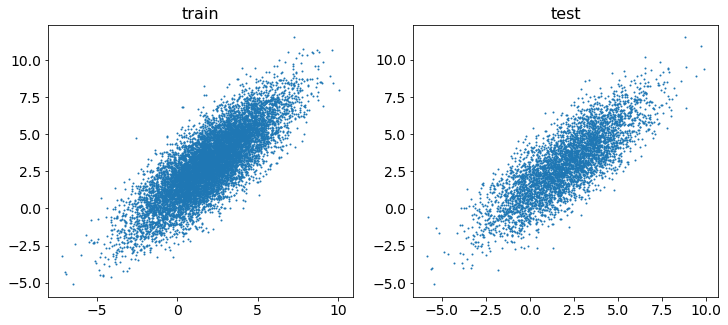

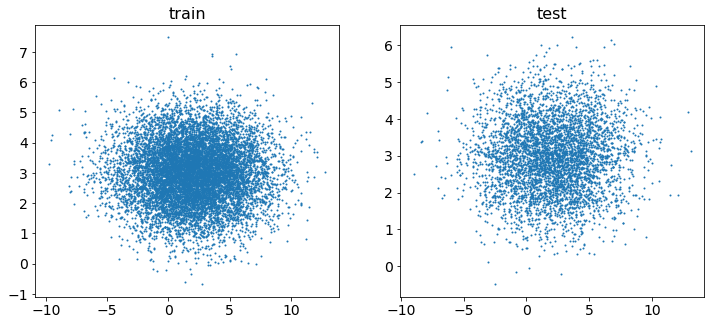

In [7]:
COUNT = 15000

train_data, test_data = generate_2d_data(COUNT, mode='multivariate')
visualize_2d_data(train_data, test_data)

train_data, test_data = generate_2d_data(COUNT, mode='univariate')
visualize_2d_data(train_data, test_data)

The difference of these two cases is the form of covariance matrix $\boldsymbol{\Sigma}$.

In multivariate case the matrix is non-diagonal, in univariate case it is strictly diagonal. As you will see, our VAE model will have absolutely different results for these datasets.

Now it is time to define our model. Our model will have the following structure:

* The latent dimensionality is equal to 2, the same as the data dimensionality ($\mathbf{z} \in \mathbb{R}^2$, $\mathbf{x} \in \mathbb{R}^2$).
* Prior distribution is standard Normal ($p(\mathbf{z}) = \mathcal{N}(0, I)$).
* Variational posterior distribution (or encoder) is $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$. Here $\boldsymbol{\phi}$ denotes all parameters of the encoder neural network. 
* Generative distribution (or decoder) is $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$. Here $\boldsymbol{\theta}$ denotes all parameters of the decoder neural network. Please note, that here we will use continuous distribution for our variables $\mathbf{x}$.
* We will consider only diagonal covariance matrices $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$, $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$.

Model objective is ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$

To make the expectation is independent of parameters $\boldsymbol{\phi}$, we will use reparametrization trick.

To calculate the loss, we should derive
- $\log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$, note that generative distribution is $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$.
- KL between $\mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x}), \boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x}))$ and $\mathcal{N}(0, I)$.

Let start with the helper functions.

In [8]:
def get_normal_KL(mean_1, log_std_1, mean_2=None, log_std_2=None):
    """
        This function should return the value of KL(p1 || p2),
        where p1 = Normal(mean_1, exp(log_std_1)), p2 = Normal(mean_2, exp(log_std_2) ** 2).
        If mean_2 and log_std_2 are None values, we will use standard normal distribution.
        Note that we consider the case of diagonal covariance matrix.
    """
    if mean_2 is None:
        mean_2 = torch.zeros_like(mean_1)
    if log_std_2 is None:
        log_std_2 = torch.zeros_like(log_std_1)

    std_1 = torch.exp(log_std_1)
    std_2 = torch.exp(log_std_2)

    mean_1, mean_2 = mean_1.float(), mean_2.float()
    std_1 , std_2  = std_1 .float(), std_2 .float()

    p  = torch.distributions.Normal(mean_1, std_1)
    q  = torch.distributions.Normal(mean_2, std_2)
    kl = torch.distributions.kl_divergence(p, q)

    return kl

def test_KL():
    assert np.isclose(get_normal_KL(torch.tensor(2), torch.tensor(3), torch.tensor(0), torch.tensor(0)).numpy(), 200.2144, rtol=1e-3)
    assert np.isclose(get_normal_KL(torch.tensor(2), torch.tensor(3), torch.tensor(4), torch.tensor(5)).numpy(), 1.50925, rtol=1e-3)
    assert np.allclose(get_normal_KL(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(), [49.2990, 1498.479], rtol=1e-3)

test_KL()

In [9]:
def get_normal_nll(x, mean, log_std):
    """
        This function should return the negative log likelihood log p(x),
        where p(x) = Normal(x | mean, exp(log_std) ** 2).
        Note that we consider the case of diagonal covariance matrix.
    """
    mean = mean              .float()
    std  = torch.exp(log_std).float()

    #if (mean.dim() == 0) and (std.dim() == 0):
    prob = torch.distributions.Normal(mean, std)
    #else:
    #    scale_tril=torch.diag(std)
    #    prob = torch.distributions.MultivariateNormal(mean, scale_tril=scale_tril)
    
    nnl = -prob.log_prob(x)
    return nnl

def test_NLL():
    assert np.isclose (get_normal_nll(torch.tensor(2), torch.tensor( 2), torch.tensor(3)).numpy(), 3.9189, rtol=1e-3)
    assert np.isclose (get_normal_nll(torch.tensor(5), torch.tensor(-3), torch.tensor(6)).numpy(), 6.9191, rtol=1e-3)
    assert np.allclose(get_normal_nll(torch.tensor((10, 10)), torch.tensor((2, 4)), torch.tensor((3, 5))).numpy(), np.array([3.9982, 5.9197]), rtol=1e-3)

test_NLL()

We will use simple fully connected dense networks for encoder and decoder.

In [10]:
class FullyConnectedMLP(nn.Module):
    def __init__(self, input_shape, hiddens, output_shape):
        assert isinstance(hiddens, list)
        super().__init__()
        self.input_shape  = (input_shape,)
        self.output_shape = (output_shape,)
        self.hiddens = hiddens

        model = []

        # ====
        # your code 
        # stack Dense layers with ReLU activation
        # note: you do not have to add relu after the last dense layer
        # ====
        model.append( nn.Linear(input_shape, hiddens[0]) )
        model.append( nn.ReLU() )
        
        for i in range( len(hiddens)-1 ):
            model.append( nn.Linear(hiddens[i+0], hiddens[i+1]) )
            model.append( nn.ReLU() )
        
        model.append( nn.Linear(hiddens[-1], output_shape) )
        self.net = nn.Sequential(*model)

    def forward(self, x):
        # ====
        # your code
        # apply network that was defined in __init__ and return the output
        # ====
        return self.net(x)

Now it is time to implement the VAE model.

In [11]:
class VAE2d(nn.Module):
    def __init__(self, n_in, n_latent, enc_hidden_sizes, dec_hidden_sizes):
        assert isinstance(enc_hidden_sizes, list)
        assert isinstance(dec_hidden_sizes, list)
        super().__init__()
        self.n_latent = n_latent

        # ====
        # your code
        # define encoder and decoder networks
        # the encoder takes n_in elements, has enc_hidden_sizes neurons in hidden layers 
        # and outputs 2 * n_latent (n_latent for means, and n_latent for std)
        # the decoder takes n_latent elements, has dec_hidden_sizes neurons in hidden layers 
        # and outputs 2 * n_in (n_in for means, and n_in for std)
        # ====
        self.encoder = FullyConnectedMLP(n_in    , enc_hidden_sizes, 2 * n_latent )
        self.decoder = FullyConnectedMLP(n_latent, dec_hidden_sizes, 2 * n_in     )
    def prior(self, n):
        # ====
        # your code
        # return n samples from prior distribution (we use standard normal for prior)
        # ====
        loc   = torch.zeros(self.n_latent)
        scale = torch.ones (self.n_latent)
        p = torch.distributions.Normal(loc, scale)
        prior_s = p.sample_n(n)

        if USE_CUDA:
            prior_s = prior_s.cuda()
        return prior_s

    def forward(self, x):
        # ====
        # your code
        # now you have to return from the model 
        # - mu_z - means for variational distribution 
        # - mu_x - means for generative distribution
        # - log_std_z - logarithm of std for variational distribution
        # - log_std_x - logarithm of std for generative distribution
        # we use logarithm, since the std is always positive
        # to get std we will exponentiate it to get rid of this constraint

        # 1) mu_z, log_std_z are outputs from the encoder
        # 2) apply reparametrization trick to get z (input of decoder)
        # (do not forget to use self.prior())
        # 3) mu_x, log_std_x are outputs from the decoder
        #    Note: [mu, log_std = decoder(input).chunk(2, dim=1)]
        
        # ====
        mu_z, log_std_z = self.encoder(x).chunk(2, dim=1)
        z = torch.exp(log_std_z)*self.prior( x.size(0) ) + mu_z
        mu_x, log_std_x = self.decoder(z).chunk(2, dim=1)
        
        return mu_z, log_std_z, mu_x, log_std_x

    def loss(self, x):
        mu_z, log_std_z, mu_x, log_std_x = self(x)
        # ====
        # your code
        # 1) apply model to get mu_z, log_std_z, mu_x, log_std_x
        # 2) compute reconstruction loss using get_normal_nll (it is the first term in ELBO)
        # 3) compute KL loss using get_normal_KL (it is the second term in ELBO)
        # ====
        recon_loss = torch.sum(get_normal_nll( x, mu_x, log_std_x ))
        #kl_loss    = torch.sum(get_normal_KL ( mu_z, log_std_z, mu_x, log_std_x ))
        kl_loss    = torch.sum(get_normal_KL ( mu_z, log_std_z, torch.zeros_like(mu_z), torch.zeros_like(log_std_z) ))


        return {
            'elbo_loss': recon_loss + kl_loss, 
            'recon_loss': recon_loss,
            'kl_loss': kl_loss
        }

    def sample(self, n, sample_from_decoder=True):
        z = None
        with torch.no_grad():
            # ====
            # your code
            # to sample from VAE model you have to sample from prior
            # and then apply decoder to prior samples.
            # parameter noise indicates whether to sample from decoder
            # or just use means of generative distribution as samples
            # 1) generate prior samples
            # 2) apply decoder
            # 3) sample from the decoder distribution if sample_from_decoder=True
            # ====
            prior_s = self.prior(n)
            mu_x, log_std_x = self.decoder(prior_s).chunk(2, dim=1)
            if sample_from_decoder:
                z = torch.exp(log_std_x)*prior_s + mu_x
            else:
                z = mu_x
        return z.cpu().numpy()

We will use the following function for training our models. Look carefully, do not change.

In [12]:
def solve_task(train_data, test_data, model, batch_size, epochs, lr, use_cuda=False, use_tqdm=False):
    train_loader = data.DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
    test_loader  = data.DataLoader(test_data, batch_size=BATCH_SIZE)

    train_losses, test_losses = train_model(
        model, train_loader, test_loader, epochs=EPOCHS, lr=LR, use_cuda=use_cuda, use_tqdm=use_tqdm, loss_key='elbo_loss'
    )
    samples_noise   = model.sample(3000, sample_from_decoder=True)
    samples_nonoise = model.sample(3000, sample_from_decoder=False)

    for key, value in test_losses.items():
        print('{}: {:.4f}'.format(key, value[-1]))

    plot_training_curves(train_losses, test_losses)
    visualize_2d_samples(samples_noise, title='Samples with Decoder Noise')
    visualize_2d_samples(samples_nonoise, title='Samples without Decoder Noise')

In [13]:
# ====
# your code
# choose these parameters (2 hidden layers could be enough for encoder and decoder)
ENC_HIDDEN_SIZES = [20,20]
DEC_HIDDEN_SIZES = [20,20]
BATCH_SIZE = 32  # any adequate value
EPOCHS = 20      # < 10
LR = 1.e-3       # < 1e-2
# ====

COUNT = 10000

Firstly, we will train the VAE model for multivariate gaussian distribution.

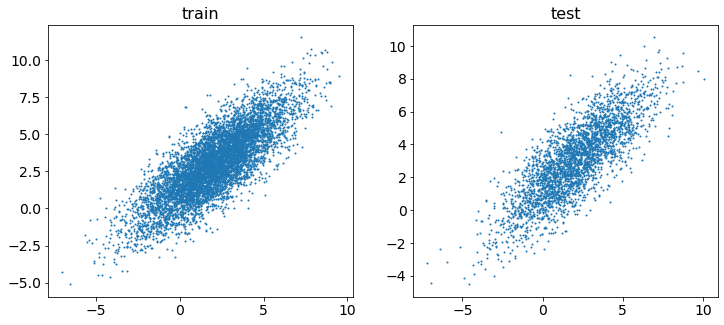

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:161: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


elbo_loss: 125.9756
recon_loss: 91.2634
kl_loss: 34.7122


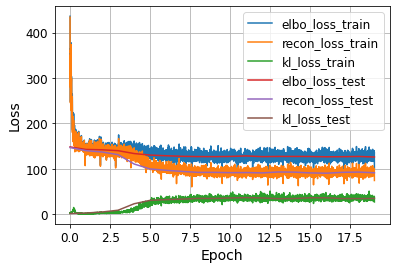

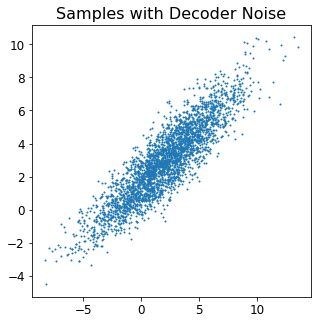

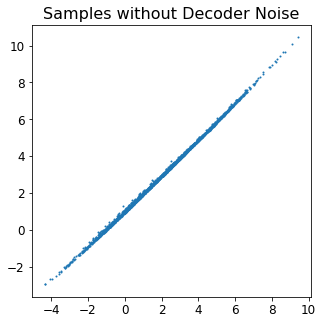

In [14]:
train_data, test_data = generate_2d_data(COUNT, mode='multivariate')
visualize_2d_data(train_data, test_data)

model = VAE2d(2, 2, ENC_HIDDEN_SIZES, DEC_HIDDEN_SIZES)
solve_task(train_data, test_data, model, BATCH_SIZE, EPOCHS, LR, use_cuda=USE_CUDA)

To analyze our models we will use the following function. Look carefully, do not change.

This function calculates the mean $\boldsymbol{\mu}_{\boldsymbol{\phi}}(\mathbf{x})$, and covariances $\boldsymbol{\Sigma}_{\boldsymbol{\phi}}(\mathbf{x})$ of the variational posterior distribution $q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})$.

In [15]:
def get_latent_stats(model, test_data, use_cuda=True, batch_size=3000):
    batch = next(iter(data.DataLoader(test_data, batch_size=batch_size, shuffle=True)))
    if USE_CUDA:
        batch = batch.cuda()

    with torch.no_grad():
        mu_z, log_std_z = model(batch)[:2]
        
    mu_z = mu_z.cpu().numpy()
    std_z = log_std_z.exp().cpu().numpy()

    return mu_z, std_z

In [16]:
# just look at these numbers and read the comments after this task
mu_z, std_z = get_latent_stats(model, test_data)

print('mu_z  = ', mu_z .mean(axis=0), '+-', mu_z .std(axis=0))
print('std_z = ', std_z.mean(axis=0), '+-', std_z.std(axis=0))

mu_z  =  [ 0.00339946 -0.01391783] +- [0.9477061  0.02852992]
std_z =  [0.34013775 0.9845568 ] +- [0.01281188 0.01983722]


/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:161: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


Secondly, we will train the VAE model for univariate gaussian distribution.

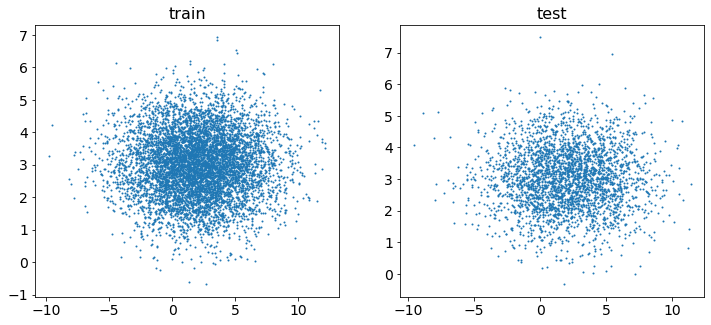

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:161: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


elbo_loss: 126.0692
recon_loss: 125.8136
kl_loss: 0.2556


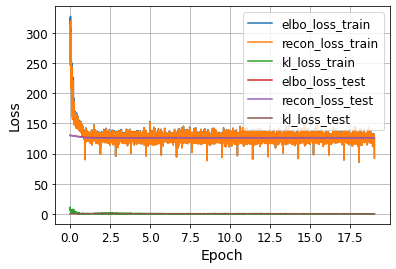

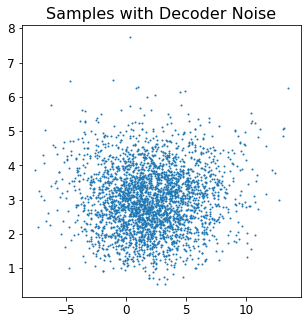

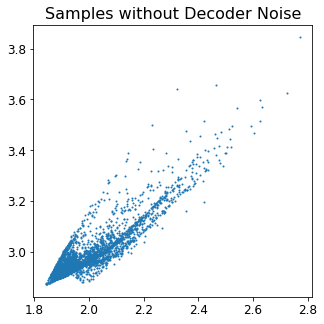

In [17]:
train_data, test_data = generate_2d_data(COUNT, mode='univariate')
visualize_2d_data(train_data, test_data)

model = VAE2d(2, 2, ENC_HIDDEN_SIZES, DEC_HIDDEN_SIZES).cuda()
solve_task(train_data, test_data, model, BATCH_SIZE, EPOCHS, LR, use_cuda=USE_CUDA)

In [18]:
# just look at these numbers and read comments after this task
mu_z, std_z = get_latent_stats(model, test_data)

print('mu_z = ', mu_z.mean(axis=0), '+-', mu_z.std(axis=0))
print('std_z = ', std_z.mean(axis=0), '+-', std_z.std(axis=0))

mu_z =  [0.00756192 0.0134231 ] +- [0.03812648 0.07172225]
std_z =  [0.98328173 0.99437094] +- [0.05503022 0.03468559]


/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:161: UserWarning: sample_n will be deprecated. Use .sample((n,)) instead
  warnings.warn('sample_n will be deprecated. Use .sample((n,)) instead', UserWarning)


After training the VAE model on these 2 datasets, have a look at "Samples without Decoder Noise" figures. These figures show the means $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. In the case of multivariate gaussian, the means are perfectly aligned with the data distribution. 
Otherwise, you have to see the strange figure in the univariate gaussian case . This happens due to so called **posterior collapse** (we will discuss it at the one of our lectures).

To be brief, the reason is the following. Our posterior distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) = \mathcal{N}(\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z}), \boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}))$ is a univariate (covariance matrix is diagonal). Thus, the model does not need latent variable since the data distribution is also univariate. In this case VAE ignores latent variable, cause the model fits the distribution without any information from latent space.

If the decoder ignores latent variable, the second term in ELBO (KL) could be low (variational posterior distribution, which is given by encoder model, is close to prior distribution for each datapoint). In the training curves you have to see that KL loss behaves differently in these two cases.

The mean and std of variational posterior distribution also proves this concept. For the second case you have to see that mean is almost zero and std is almost one.

It is a real problem for generative models and we will discuss later how to overcome it.

## Task 3: VAE on CIFAR10 data (5pt)

In this task you will implement VAE model for CIFAR10 dataset. 

Download the data from [here](https://drive.google.com/file/d/16j3nrJV821VOkkuRz7aYam8TyIXLnNme/view?usp=sharing) (you could use the cell below).

In [19]:
!gdown --id 16j3nrJV821VOkkuRz7aYam8TyIXLnNme

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=16j3nrJV821VOkkuRz7aYam8TyIXLnNme 



In [20]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


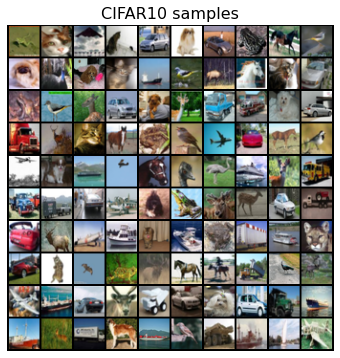

In [21]:
train_data, test_data = load_pickle('/content/drive/MyDrive/cifar10.pkl', flatten=False, binarize=False)
visualize_images(train_data, 'CIFAR10 samples')

In [22]:
print(train_data.shape)

(50000, 3, 32, 32)


Here the model specification will be almost the same (as in Task 2) with the following differences:
* Now our encoder and decoder will be convolutional.
* We do not fit the covariance matrix $\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z})$ in the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$. We assume that it is identical ($\boldsymbol{\Sigma}_{\boldsymbol{\theta}}(\mathbf{z}) = \mathbf{I}$). We will use the $\boldsymbol{\mu}_{\boldsymbol{\theta}}(\mathbf{z})$ means of the generative distribution $p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta})$ as model samples.
* Model objective is slightly modified ELBO:
$$
    \mathcal{L}(\boldsymbol{\phi}, \boldsymbol{\theta}) = \mathbb{E}_{q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi})} \log p(\mathbf{x} | \mathbf{z}, \boldsymbol{\theta}) - \beta * KL (q(\mathbf{z} | \mathbf{x}, \boldsymbol{\phi}) || p(\mathbf{z})).
$$
Here we introduce the parameter $\beta$. It reweights KL term in the total loss. We will discuss the choice of this parameter later in the course. In this exercise you have to play with it, starting with the value $\beta = 1$ (standard ELBO).

Let define our convolutional encoder and decoder.

In [23]:
class ConvEncoder(nn.Module):
    def __init__(self, input_shape, n_latent):
        super().__init__()
        self.input_shape = input_shape
        self.n_latent = n_latent
        # ====
        # your code
        # we suggest to use the following architecture
        # conv2d(32) -> relu -> conv(64) -> relu -> conv(128) -> relu -> conv(256) -> fc(2 * n_latent)
        # but we encourage you to create your own architecture
        # ====

        model = []
        model.append( nn.Conv2d(input_shape[0],  32, kernel_size=(2,2), padding='same') )
        model.append( nn.ReLU() )
        model.append( nn.Conv2d(            32,  64, kernel_size=(2,2), padding='same') )
        model.append( nn.ReLU() )
        model.append( nn.Conv2d(            64, 128, kernel_size=(2,2), padding='same') )
        model.append( nn.ReLU() )
        model.append( nn.Conv2d(           128, 256, kernel_size=(2,2), padding='same') )
        self.conv = nn.Sequential(*model)

        dummy_input  = torch.zeros((1,) + input_shape)
        dummy_output = self.conv(dummy_input)
        dummy_output = torch.flatten(dummy_output)
        
        self.fc = nn.Linear(dummy_output.size(0), 2*n_latent)

    def forward(self, x):
        # ====
        # your code
        # 1) apply convs
        # 2) reshape the output to 2d matrix for last fc layer
        # 3) apply fc layer
        # ====
        y = self.conv(x)
        y = torch.flatten(y, start_dim=1)
        z = self.fc(y)

        mu, log_std = z.chunk(2, dim=1)
        return mu, log_std
        

class ConvDecoder(nn.Module):
    def __init__(self, n_latent, output_shape):
        super().__init__()
        self.n_latent = n_latent
        self.output_shape = output_shape

        self.base_size = (128, output_shape[1] // 8, output_shape[2] // 8)
        # ====
        # your code
        # we suggest to use the following architecture
        # fc -> conv2dtranspose(128) -> relu -> conv2dtranspose(64) -> relu 
        # -> conv2dtranspose(32) -> relu -> conv2dtranspose(3)
        # but we encourage you to create your own architecture
        # ====
        self.fc = nn.Linear( n_latent, np.prod(self.base_size) )
                
        model = []
        model.append( nn.ConvTranspose2d(128, 128, kernel_size=3, output_padding=1, padding=1, stride=2) ) # 4x4 => 8x8
        model.append( nn.ReLU() )
        model.append( nn.Conv2d(128, 128, kernel_size=3, padding=1) )
        model.append( nn.ReLU() ) 
        model.append( nn.ConvTranspose2d( 128, 64, kernel_size=3, output_padding=1, padding=1, stride=2) ) # 8x8 => 16x16
        model.append( nn.ReLU() ) 
        model.append( nn.Conv2d( 64, 64, kernel_size=3, padding=1) )
        model.append( nn.ReLU() )
        model.append( nn.ConvTranspose2d(64, 3, kernel_size=3, output_padding=1, padding=1, stride=2) ) # 16x16 => 32x32
        model.append( nn.Tanh() )
        
        self.conv = nn.Sequential(*model)
        

    def forward(self, z):
        # ====
        # your code
        # 1) apply fc layer
        # 2) reshape the output to 4d tensor 
        # 3) apply conv layers
        # ====
        y = self.fc(z)
        y = y.view(-1, *self.base_size)
        x = self.conv(y)

        return x, torch.zeros_like(x)

Now it is time to implement VAE model for image dataset.

In [24]:
class ConvVAE(nn.Module):
    def __init__(self, input_shape, n_latent, beta=1):
        super().__init__()
        assert len(input_shape) == 3

        self.input_shape = input_shape
        self.n_latent = n_latent
        self.beta = beta
        # ====
        # your code
        # define encoder with input size input_shape and output dim n_latent
        # define decoder with input dim n_latent and output size input_shape
        # ====
        self.encoder = ConvEncoder(input_shape, n_latent)
        self.decoder = ConvDecoder(n_latent, input_shape)

    def prior(self, n, use_cuda=True):
        # ====
        # your code
        # return n samples from prior distribution (we use standart normal for prior)
        # ====

        loc   = torch.zeros(self.n_latent)
        scale = torch.ones (self.n_latent)
        p = torch.distributions.Normal(loc, scale)
        prior_s = p.sample((n,))

        if use_cuda:
            prior_s = prior_s.cuda()
        return prior_s

    def forward(self, x):
        # ====
        # your code
        # 1) apply encoder to get mu_z, log_std_z
        # 2) apply reparametrization trick (use self.prior)
        # 3) apply decoder to get mu_x (which corresponds to reconstructed x)
        # ====
        
        mu_z, log_std_z = self.encoder(x)
        z = torch.exp(log_std_z)*self.prior( x.size(0) ) + mu_z
        mu_x, log_std_x = self.decoder(z)

        return mu_z, log_std_z, mu_x, log_std_x
        
    def loss(self, x):
        # ====
        # your code
        # 1) make forward step to get mu_z, log_std_z, x_recon
        # 2) calculate recon_loss (use get_normal_nll)
        # 3) calcuclate kl_loss (use get_normal_KL)
        # ==== 
        mu_z, log_std_z, mu_x, log_std_x = self.forward(x)
        
        recon_loss = torch.sum(get_normal_nll( x, mu_x, log_std_x ))
        kl_loss    = torch.sum(get_normal_KL ( mu_z, log_std_z, torch.zeros_like(mu_z), torch.zeros_like(log_std_z) ))
        return {
            'elbo_loss': recon_loss + self.beta * kl_loss, 
            'recon_loss': recon_loss,
            'kl_loss': kl_loss
        }

    def sample(self, n):
        with torch.no_grad():
            # ====
            # your code
            # 1) generate prior samples
            # 2) apply decoder
            # ====
            prior_s = self.prior(n)
            mu_x, log_std_x = self.decoder(prior_s)
            x_recon = mu_x
            samples = torch.clamp(x_recon, -1, 1)
        return samples.cpu().numpy() * 0.5 + 0.5

  0%|          | 0/5 [00:00<?, ?it/s]

elbo_loss: 369051.5145
recon_loss: 366361.9043
kl_loss: 17930.7226


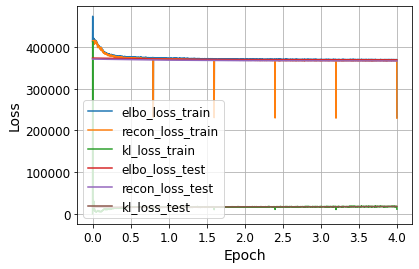

In [27]:
# ====
# your code
# choose these parameters
BATCH_SIZE =  128  # any adequate value
EPOCHS =      5    # < 16
LR =          3e-4 # < 1e-3
N_LATENS =    256  # 128 < _ < 1024
BETA =        0.15  # 0.1 < _ < 10
# ====

# we center the data, because it helps the model to fit
centered_train_data = train_data * 2 - 1
centered_test_data  = test_data  * 2 - 1

train_loader = data.DataLoader(centered_train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = data.DataLoader(centered_test_data, batch_size=BATCH_SIZE)

model = ConvVAE((3, 32, 32), N_LATENS, BETA)

train_losses, test_losses = train_model(
    model, 
    train_loader, 
    test_loader, 
    epochs=EPOCHS, 
    lr=LR, 
    loss_key='elbo_loss', 
    use_tqdm=True, 
    use_cuda=USE_CUDA, 
)
for key, value in test_losses.items():
    print('{}: {:.4f}'.format(key, value[-1]))
plot_training_curves(train_losses, test_losses)

Now we could visualize the model outputs.

1. We could sample new images from our model (sample latent variable from the prior and apply the decoder).
2. We could visualize image reconstructions (apply the encoder and the decoder to the fixed image).
3. Visualize interpolations (apply the encoder to two images $\mathbf{x}_1$ and $\mathbf{x}_2$ to obtain the latent variables $\mathbf{z}_1$ and $\mathbf{z}_2$, apply the decoder to the latent variables $\mathbf{z}$ lying on the segment between $\mathbf{z}_1$ and $\mathbf{z}_2$).

**Note:** it is ok, that your samples are blurry. We do not use difficult architectures and do not tune hyperparameters carefully.

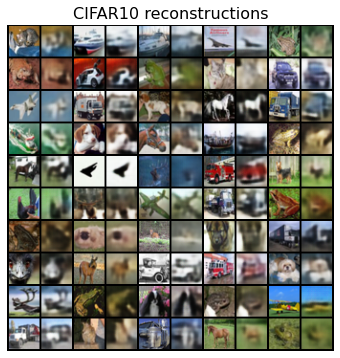

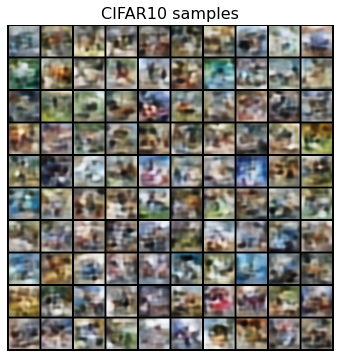

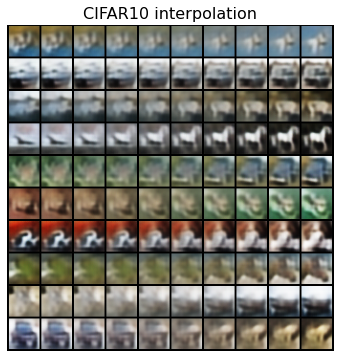

In [28]:
samples = model.sample(100)

x = next(iter(test_loader))[:50]

if USE_CUDA:
    x = x.cuda()

with torch.no_grad():
    z, _ = model.encoder(x)
    x_recon = torch.clamp(model.decoder(z)[0], -1, 1)
reconstructions = torch.stack((x, x_recon), dim=1).view(-1, 3, 32, 32) * 0.5 + 0.5
reconstructions = reconstructions.cpu().numpy()

x = next(iter(test_loader))[:20].cuda()
with torch.no_grad():
    z, _ = model.encoder(x)
    z1, z2 = z.chunk(2, dim=0)
    interps = [model.decoder(z1 * (1 - alpha) + z2 * alpha)[0] for alpha in np.linspace(0, 1, 10)]
    interps = torch.stack(interps, dim=1).view(-1, 3, 32, 32)
    interps = torch.clamp(interps, -1, 1) * 0.5 + 0.5
interps = interps.cpu().numpy()

show_samples(reconstructions, 'CIFAR10 reconstructions')
show_samples(samples, 'CIFAR10 samples')
show_samples(interps, 'CIFAR10 interpolation')